In [2]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.3 MB/s eta 0:00:00


In [72]:
import numpy as np
np.random.seed(42)
import pandas as pd
import math
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.optimizers import Adam, Nadam, Adamax
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.wrappers.scikit_learn import KerasClassifier

import keras_tuner as kt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
# Download Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=169)

y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [34]:
# this function plots the accury against the epchos.

def plot_accuracy_vs_epochs(history):
    epochs = len(history.history['val_accuracy'])+1
    fig = plt.figure(figsize=(6, 6))
    plt.plot(range(1,len(history.history['val_accuracy'])+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,len(history.history['accuracy'])+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()

In [33]:
# this function plots the change in learning rate against the epchos.

def plot_learning_rate(loss_history):
# plot learning rate
  fig = plt.figure()
  plt.plot(range(1,epochs+1),loss_history.lrate,label='learning rate')
  plt.xlabel("epoch")
  plt.xlim([1,epochs+1])
  plt.ylabel("learning rate")
  plt.legend(loc=0)
  plt.grid(True)
  plt.title("Learning rate")
  plt.show()

In [32]:
# this function plots the change in learning rate against the epchos.

def plot_learning_rate(loss_history):
# plot learning rate
  fig = plt.figure()
  plt.plot(range(1,epochs+1),loss_history.lrate,label='learning rate')
  plt.xlabel("epoch")
  plt.xlim([1,epochs+1])
  plt.ylabel("learning rate")
  plt.legend(loc=0)
  plt.grid(True)
  plt.title("Learning rate")
  plt.show()

In [30]:
# Function to create a basic model.

def nn_model_fancy(perceptrons_in_each_layer,
                   hidden_activation,
                   initializer,
                   dropout_rate,
                   optimiser_type,
                   loss_fuction):
    model = keras.Sequential([
            # input layer
            keras.layers.Dense(perceptrons_in_each_layer, # hyperparameter
                               activation= hidden_activation , # hyperparameter
                               input_shape=(784,),
                               kernel_initializer=initializer # hyperparameter
                               ),
            # hidden layer 1
            keras.layers.Dense(perceptrons_in_each_layer,
                               activation= hidden_activation,
                               kernel_initializer=initializer
                               ),
            # hidden layer 2
            keras.layers.Dense(perceptrons_in_each_layer,
                               activation= hidden_activation,
                               kernel_initializer=initializer
                               ),

            keras.layers.Dropout(dropout_rate), # hyperparameter
            # Output layer
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ]
    )
    model.summary()

    model.compile(optimizer = optimiser_type, # hyperparameter
                  loss = loss_fuction,  # hyperparameter
                  metrics = ['accuracy'])

    return model

In [131]:
# building basic model with Activation as relu

basic_model = nn_model_fancy (
perceptrons_in_each_layer = 512,
hidden_activation = "relu",
initializer = tf.keras.initializers.RandomNormal(stddev=0.01),
dropout_rate = 0 ,
optimiser_type = tf.keras.optimizers.Adam(learning_rate=0.001),
loss_fuction = "categorical_crossentropy",
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [132]:
batch_size = 128
epochs = 15
basic_model_history = basic_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/15
375/375 [==============================] - 12s 30ms/step - loss: 0.6441 - accuracy: 0.7914 - val_loss: 0.4252 - val_accuracy: 0.8461
Epoch 2/15
375/375 [==============================] - 11s 29ms/step - loss: 0.4094 - accuracy: 0.8498 - val_loss: 0.3953 - val_accuracy: 0.8596
Epoch 3/15
375/375 [==============================] - 10s 26ms/step - loss: 0.3762 - accuracy: 0.8620 - val_loss: 0.3708 - val_accuracy: 0.8689
Epoch 4/15
375/375 [==============================] - 10s 27ms/step - loss: 0.3586 - accuracy: 0.8677 - val_loss: 0.4097 - val_accuracy: 0.8476
Epoch 5/15
375/375 [==============================] - 10s 27ms/step - loss: 0.3311 - accuracy: 0.8782 - val_loss: 0.3529 - val_accuracy: 0.8727
Epoch 6/15
375/375 [==============================] - 11s 29ms/step - loss: 0.3175 - accuracy: 0.8835 - val_loss: 0.3613 - val_accuracy: 0.8673
Epoch 7/15
375/375 [==============================] - 11s 29ms/step - loss: 0.3118 - accuracy: 0.8842 - val_loss: 0.3377 - val_accuracy:

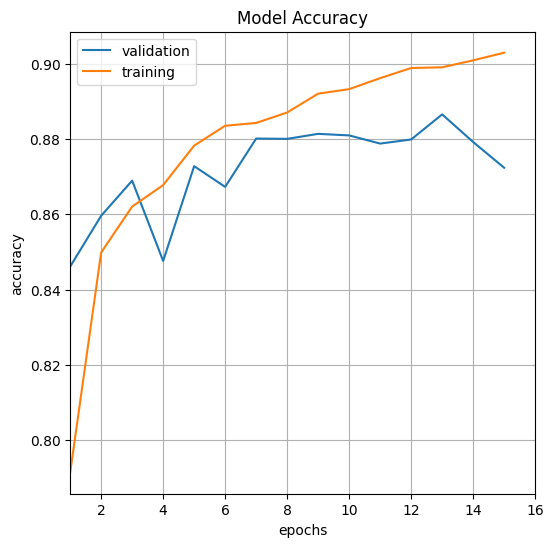

In [133]:
plot_accuracy_vs_epochs(basic_model_history)

In [134]:
# Evaluate the model on test data
y_pred = basic_model.predict(x_test)
test_loss, test_acc = basic_model.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {test_acc * 100:.2f}%")

# Evaluate Precision and Recall
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.3798 - accuracy: 0.8621
Точність на тестових даних: 86.21%
Precision: 0.86
Recall: 0.86


#Hyperparameter tuning the architecture with KerasTuner

In [52]:
hp = kt.HyperParameters()

In [142]:
def build_model(hp):
    model = keras.Sequential()

    # input layer
    model.add(
        layers.Dense(input_shape=(784,),
            # Tune number of units.
            units=hp.Int("units", min_value=256, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh", "sigmoid"]),
        )
    )

    # hidden layer 1
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=256, max_value=512, step=32),
            activation=hp.Choice("activation", ["relu", "tanh", "sigmoid"]),
        )
    )

    # Hidden layer 2
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=256, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh", "sigmoid"]),
        )
    )

    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=hp.Float(min_value=0.1, max_value=0.5)))
    model.add(layers.Dense(10, activation="softmax"))

    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    optimizer_choice = hp.Choice("optimizer", ["adam", "adamax"])

    if optimizer_choice == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "adamax":
        optimizer = keras.optimizers.Nadam(learning_rate=learning_rate)
    # elif optimizer_choice == "sgd":
    #     optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer choice")


    model.compile(
        optimizer=keras.optimizers.Nadam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [143]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="tuning_dir",
    project_name="Fashion_MNIST",
)

In [ ]:
tuner.search_space_summary()

In [145]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, mode='max')

In [146]:
tuner.search(x_train, y_train, epochs=15, validation_data=(x_val, y_val), callbacks=[early_stopping])

Trial 5 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.8823333382606506
Total elapsed time: 00h 32m 52s


In [147]:
# Виведіть оптимальні гіперпараметри
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
tuner.results_summary()

In [150]:
# Модель з оптимальними параметрами
model = tuner.hypermodel.build(best_hps)

In [151]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 384)               301440    
                                                                 
 dense_4 (Dense)             (None, 384)               147840    
                                                                 
 dense_5 (Dense)             (None, 384)               147840    
                                                                 
 dense_6 (Dense)             (None, 10)                3850      
                                                                 
Total params: 600,970
Trainable params: 600,970
Non-trainable params: 0
_________________________________________________________________


In [152]:
# Навчіть модель з оптимальними параметрами

batch_size = 128
epochs = 100

early_stopping = EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True, verbose=1)

basic_model_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[early_stopping])



Epoch 1/100
375/375 [==============================] - 9s 20ms/step - loss: 2.5726 - accuracy: 0.7730 - val_loss: 0.7894 - val_accuracy: 0.7796
Epoch 2/100
375/375 [==============================] - 8s 22ms/step - loss: 0.5380 - accuracy: 0.8311 - val_loss: 0.5439 - val_accuracy: 0.8285
Epoch 3/100
375/375 [==============================] - 8s 21ms/step - loss: 0.4164 - accuracy: 0.8575 - val_loss: 0.4731 - val_accuracy: 0.8499
Epoch 4/100
375/375 [==============================] - 8s 20ms/step - loss: 0.3728 - accuracy: 0.8678 - val_loss: 0.4286 - val_accuracy: 0.8608
Epoch 5/100
375/375 [==============================] - 8s 22ms/step - loss: 0.3525 - accuracy: 0.8738 - val_loss: 0.4112 - val_accuracy: 0.8615
Epoch 6/100
375/375 [==============================] - 7s 19ms/step - loss: 0.3341 - accuracy: 0.8789 - val_loss: 0.4402 - val_accuracy: 0.8571
Epoch 7/100
375/375 [==============================] - 8s 22ms/step - loss: 0.3188 - accuracy: 0.8840 - val_loss: 0.4466 - val_accuracy:

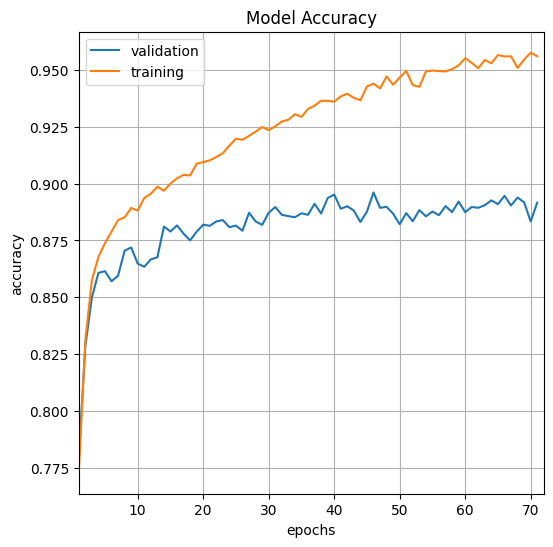

In [153]:
plot_accuracy_vs_epochs(basic_model_history)

In [154]:
# Evaluate the model on test data
y_pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {test_acc * 100:.2f}%")

# Evaluate Precision and Recall
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.8888
Точність на тестових даних: 88.88%
Precision: 0.89
Recall: 0.89


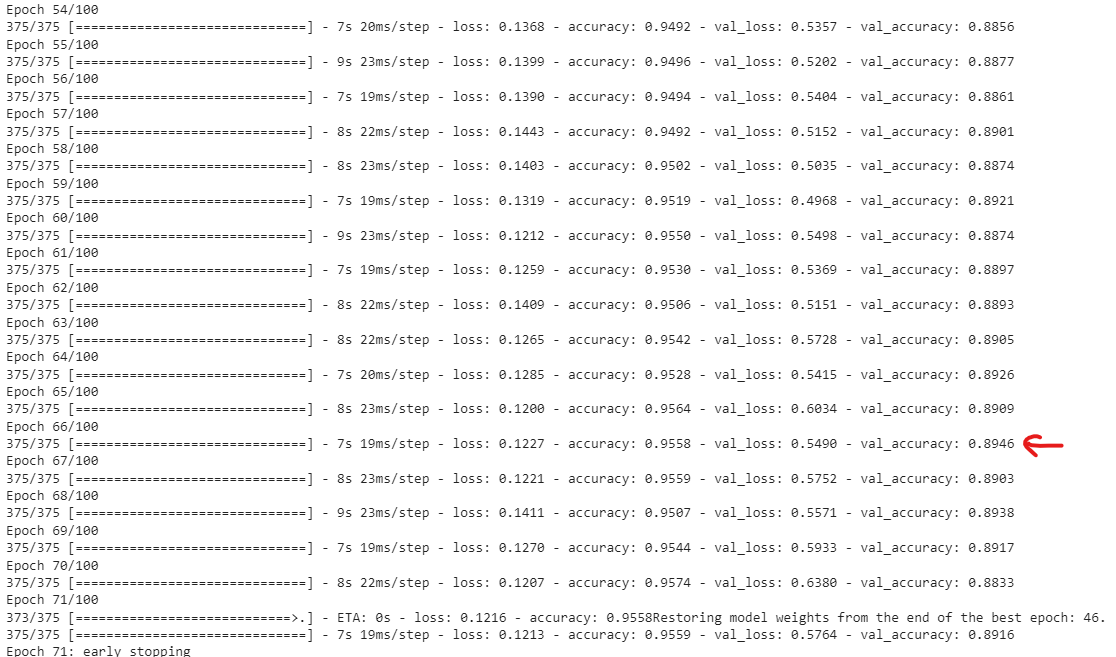

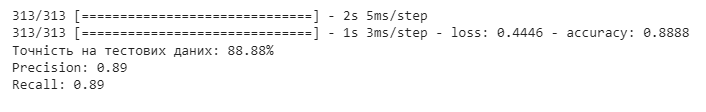

Максимум, який зміг видавити.
Через тюнер довго підбирає гіперпараметри. Швидше підібрати вручну.